** D'abord, faire un Run All Cell sur le notebook "hw2_site1.ipynb", puis faire les tasks d'analyse ici **

In [30]:
import pandas as pd

uni_s1 = pd.read_pickle("site1.pkl")
uni_s1.head()

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url
0,Massachusetts Institute of Technology (MIT),1,United States,North America,1679.0,2982.0,3717.0,11067.0,/universities/massachusetts-institute-technolo...
1,Stanford University,2,United States,North America,2042.0,4285.0,3611.0,15878.0,/universities/stanford-university
2,Harvard University,3,United States,North America,1311.0,4350.0,5266.0,22429.0,/universities/harvard-university
3,California Institute of Technology (Caltech),4,United States,North America,350.0,953.0,647.0,2255.0,/universities/california-institute-technology-...
4,University of Cambridge,5,United Kingdom,Europe,2278.0,5490.0,6699.0,18770.0,/universities/university-cambridge


In [72]:
uni_s1['ratioFacStu'] = uni_s1.apply(lambda row: row.fac_c_total/row.stu_c_total, axis=1)
uni_s1['ratioInter'] = uni_s1.apply(lambda row: row.stu_c_inter/row.stu_c_total, axis=1)
uni_s1_FSsort=uni_s1.sort_values('ratioFacStu', ascending=False)
uni_s1_Int=uni_s1.sort_values('ratioInter', ascending=False)
uni_s1_FSsort.head()

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url,ratioFacStu,ratioInter
3,California Institute of Technology (Caltech),4,United States,North America,350.0,953.0,647.0,2255.0,/universities/california-institute-technology-...,0.422616,0.286918
15,Yale University,16,United States,North America,1708.0,4940.0,2469.0,12402.0,/universities/yale-university,0.398323,0.199081
5,University of Oxford,6,United Kingdom,Europe,2964.0,6750.0,7353.0,19720.0,/universities/university-oxford,0.342292,0.372870
4,University of Cambridge,5,United Kingdom,Europe,2278.0,5490.0,6699.0,18770.0,/universities/university-cambridge,0.292488,0.356899
16,Johns Hopkins University,17,United States,North America,1061.0,4462.0,4105.0,16146.0,/universities/johns-hopkins-university,0.276353,0.254243


In [73]:
uni_s1_Int.head()

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url,ratioFacStu,ratioInter
34,London School of Economics and Political Scien...,35,United Kingdom,Europe,687.0,1088.0,6748.0,9760.0,/universities/london-school-economics-politica...,0.111475,0.691393
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),12,Switzerland,Europe,1300.0,1695.0,5896.0,10343.0,/universities/ecole-polytechnique-f%C3%A9d%C3%...,0.163879,0.570047
7,Imperial College London,8,United Kingdom,Europe,2071.0,3930.0,8746.0,16090.0,/universities/imperial-college-london,0.244251,0.543567
198,Maastricht University,200,Netherlands,Europe,502.0,1277.0,8234.0,16385.0,/universities/maastricht-university,0.077937,0.502533
47,Carnegie Mellon University,47,United States,North America,425.0,1342.0,6385.0,13356.0,/universities/carnegie-mellon-university,0.100479,0.478062


In [77]:
uni_s1_country=uni_s1.groupby('country')
ratioFacStuMean=[] 
ratioInterMean=[]
for variable in uni_s1.country.unique():
    tmp=uni_s1_country.get_group(variable)
    ratioFacStuMean.append(tmp['ratioFacStu'].mean()) 
    ratioInterMean.append(tmp['ratioInter'].mean())
uni_s1_ratio_country=pd.DataFrame(data={'country':uni_s1.country.unique(), 'ratioFacStuMean': ratioFacStuMean, 'ratioInterMean':ratioInterMean})
uni_s1_RFC_country=uni_s1_ratio_country.sort_values('ratioFacStuMean', ascending=False)
uni_s1_RI_country=uni_s1_ratio_country.sort_values('ratioInterMean', ascending=False)
uni_s1_RI_country

,country,ratioFacStuMean,ratioInterMean
1,United Kingdom,0.135913,0.351308
4,Australia,0.076407,0.346878
2,Switzerland,0.134872,0.313816
6,Hong Kong,0.128988,0.312148
28,Austria,0.057298,0.306095
3,Singapore,0.162279,0.277091
8,Canada,0.103298,0.252604
18,New Zealand,0.068687,0.248971
11,Netherlands,0.105311,0.245456
19,Ireland,0.082180,0.241791


In [78]:
uni_s1_RFC_country

,country,ratioFacStuMean,ratioInterMean
20,Russia,0.221910,0.168624
14,Denmark,0.186580,0.164809
32,Saudi Arabia,0.175828,0.163742
3,Singapore,0.162279,0.277091
7,Japan,0.155840,0.090000
22,Malaysia,0.153893,0.194168
0,United States,0.151151,0.194802
9,South Korea,0.149356,0.102453
10,France,0.144006,0.213286
27,Israel,0.136047,0.062549


In [79]:
uni_s1_region=uni_s1.groupby('region')
ratioFacStuMean=[] 
ratioInterMean=[]
for variable in uni_s1.region.unique():
    tmp=uni_s1_region.get_group(variable)
    ratioFacStuMean.append(tmp['ratioFacStu'].mean()) 
    ratioInterMean.append(tmp['ratioInter'].mean())
uni_s1_ratio_region=pd.DataFrame(data={'region':uni_s1.region.unique(), 'ratioFacStuMean': ratioFacStuMean, 'ratioInterMean':ratioInterMean})
uni_s1_RFC_region=uni_s1_ratio_region.sort_values('ratioFacStuMean', ascending=False)
uni_s1_RI_region=uni_s1_ratio_region.sort_values('ratioInterMean', ascending=False)
uni_s1_RI_region

,ratioFacStuMean,ratioInterMean,region
3,0.075003,0.329077,Oceania
1,0.120003,0.245932,Europe
0,0.144831,0.202437,North America
5,0.088450,0.169703,Africa
2,0.134673,0.132394,Asia
4,0.096779,0.071751,Latin America


In [80]:
uni_s1_RFC_region

,ratioFacStuMean,ratioInterMean,region
0,0.144831,0.202437,North America
2,0.134673,0.132394,Asia
1,0.120003,0.245932,Europe
4,0.096779,0.071751,Latin America
5,0.088450,0.169703,Africa
3,0.075003,0.329077,Oceania


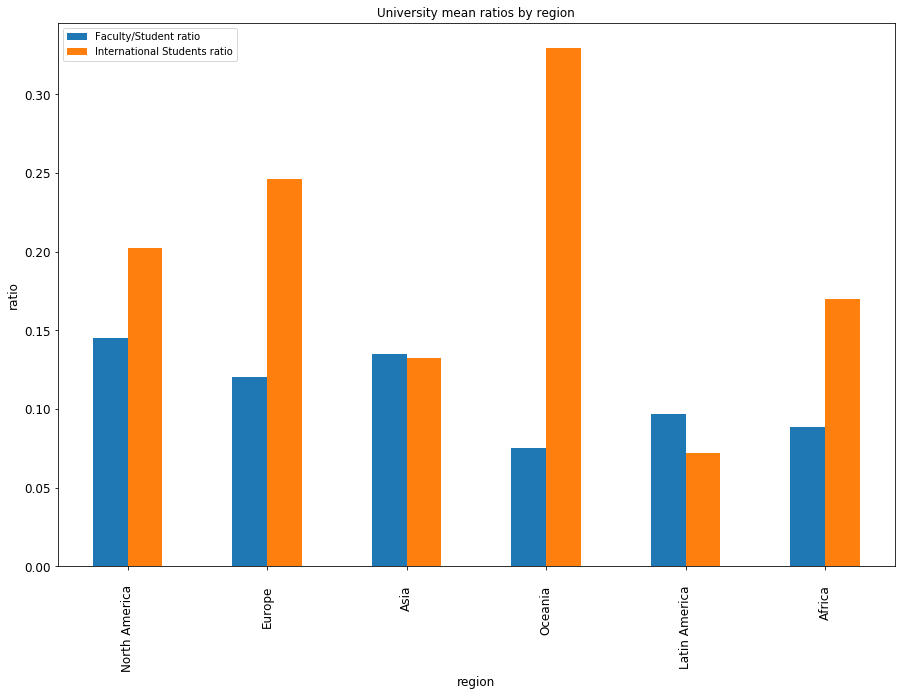

In [88]:
import matplotlib.pyplot as plt
ax = uni_s1_ratio_region[['ratioFacStuMean','ratioInterMean']].plot(kind='bar', title ="University mean ratios by region", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("region", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_region.region.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['Faculty/Student ratio', 'International Students ratio'], loc='upper left')
plt.show()

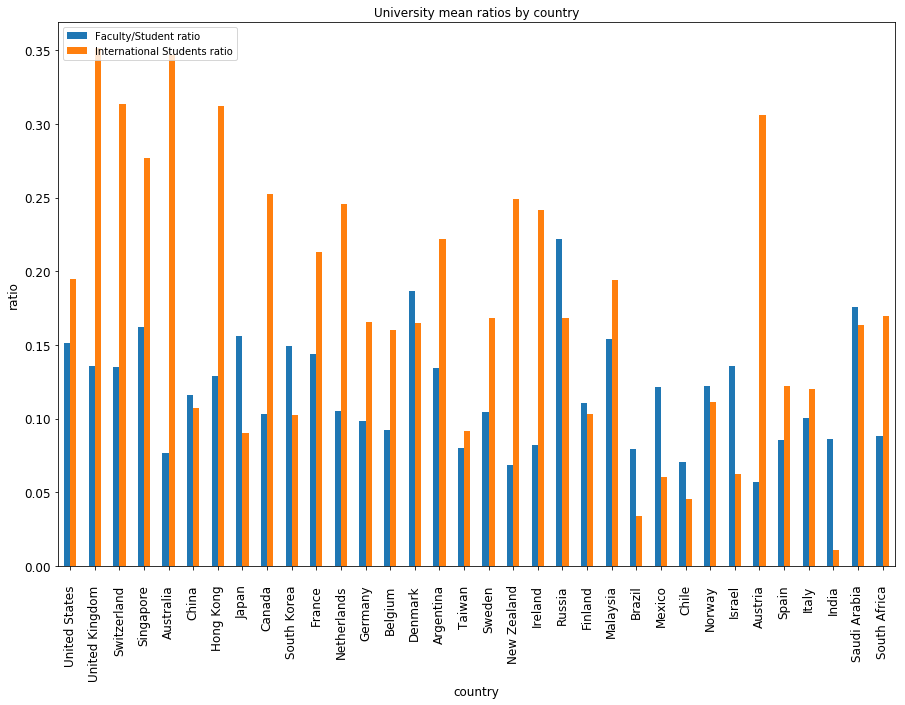

In [91]:
ax = uni_s1_ratio_country[['ratioFacStuMean','ratioInterMean']].plot(kind='bar', title ="University mean ratios by country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_country.country.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['Faculty/Student ratio', 'International Students ratio'], loc='upper left')
plt.show()

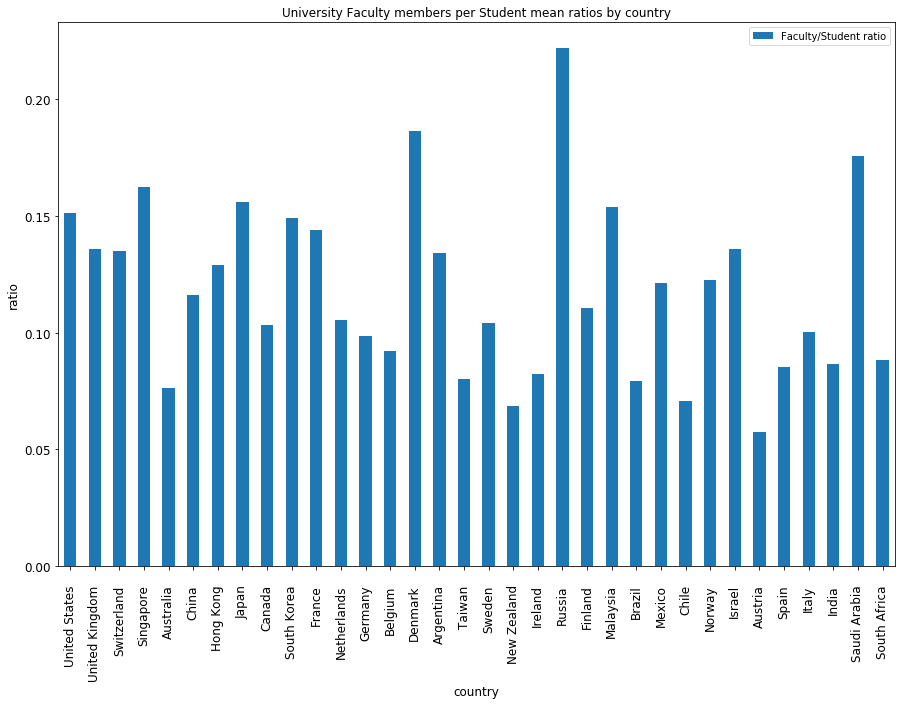

In [92]:
ax = uni_s1_ratio_country[['ratioFacStuMean']].plot(kind='bar', title ="University Faculty members per Student mean ratios by country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_country.country.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['Faculty/Student ratio'])
plt.show()

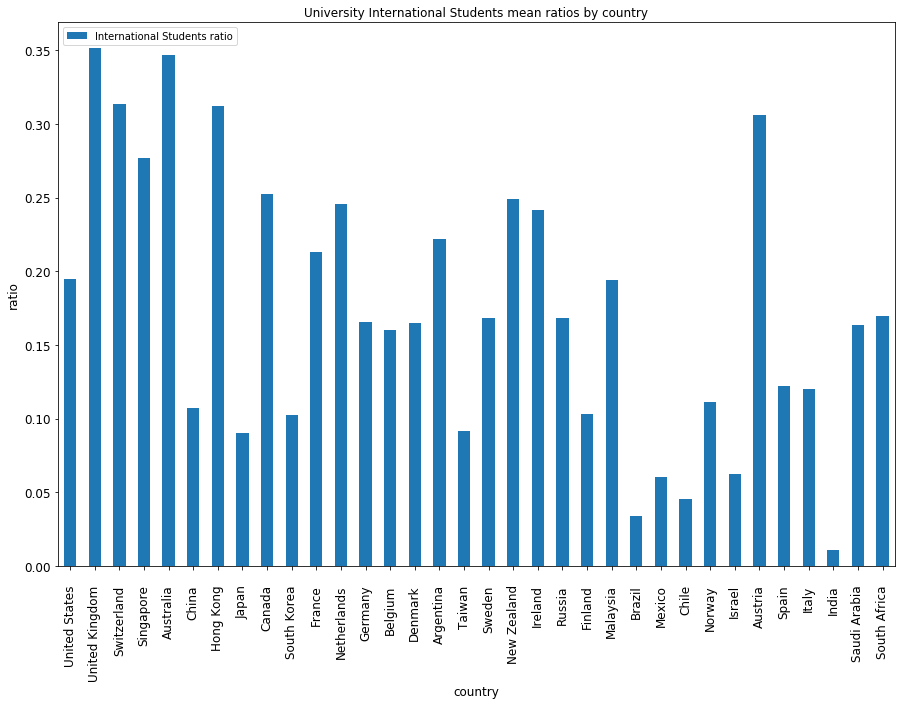

In [93]:
ax = uni_s1_ratio_country[['ratioInterMean']].plot(kind='bar', title ="University International Students mean ratios by country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_country.country.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['International Students ratio'], loc='upper left')
plt.show()